In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [2]:
X = [[0,1],[1,0],[0,0],[1,1]]
Y = [1,1,1,0]

In [17]:
#initializa os pesos aleatoriamente e zera o bias
def weight_init(num_inputs):
    w = np.random.randn(dim)*0.01
    b = 0
    return w,b

In [36]:
def activation_func(func_type, z):
    if func_type == 'sigmoid':
        return 1/(1+np.exp(-z))
    elif func_type == 'tanh':
        return (2/(1+np.exp(-2*z)) -1)
    elif func_type == 'relu':
        return np.max(z,0)

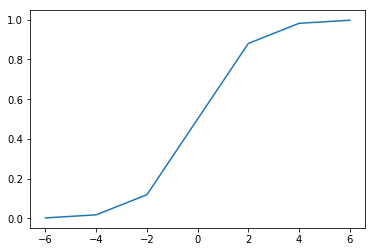

In [40]:
z = np.array([-6,-4,-2,0,2,4,6])
sigmoid = []
for i in range(len(z)):
    sigmoid.append(activation_func('sigmoid', z[i]))

plt.plot(z, sigmoid)
plt.show()